In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image

In [2]:
def get_image_files(directory):
    image_files = []
    for file in os.listdir(directory):
        if file.endswith(".pgm"):
            image_files.append(os.path.join(directory, file))
    return image_files

In [3]:


path = './database'
images = get_image_files(path)
gt_images = [i for i in images if 'gt' in i]


print(gt_images)

['./database\\10_gt.pgm', './database\\11_gt.pgm', './database\\12_gt.pgm', './database\\13_gt.pgm', './database\\14_gt.pgm', './database\\15_gt.pgm', './database\\16_gt.pgm', './database\\17_gt.pgm', './database\\18_gt.pgm', './database\\19_gt.pgm', './database\\1_gt.pgm', './database\\20_gt.pgm', './database\\2_gt.pgm', './database\\3_gt.pgm', './database\\4_gt.pgm', './database\\5_gt.pgm', './database\\6_gt.pgm', './database\\7_gt.pgm', './database\\8_gt.pgm', './database\\9_gt.pgm']


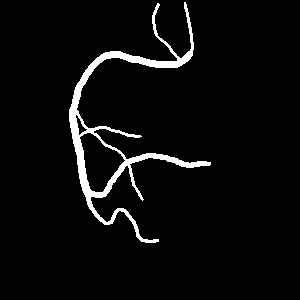

In [30]:

# Load an image
image = cv2.imread(gt_images[10])

Image.fromarray(image)


In [33]:
def skeletonizeMorphological(img):
    img = cv2.imread(img,0)
    size = np.size(img)
    skel = np.zeros(img.shape,np.uint8)

    ret,img = cv2.threshold(img,127,255,0)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    done = False

    #Obtained from: https://opencvpython.blogspot.com/2012/05/skeletonization-using-opencv-python.html
    #Skeleton = I - HitOrMiss(I, J)
        #https://homepages.inf.ed.ac.uk/rbf/HIPR2/thin.htm
    while( not done):
        eroded = cv2.erode(img,element)
        temp = cv2.dilate(eroded,element)
        temp = cv2.subtract(img,temp)
        skel = cv2.bitwise_or(skel,temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros==size:
            done = True
    
    return skel

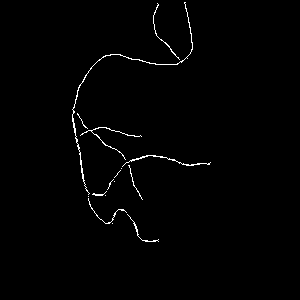

In [34]:

skel = skeletonizeMorphological(gt_images[10])
Image.fromarray(skel)


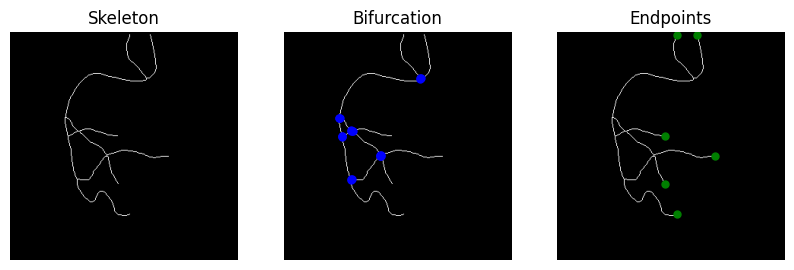

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
from skimage.morphology import skeletonize
from scipy.ndimage import convolve
from skimage import io

def skeletonize2(image_path):
    image = cv2.imread(image_path, 0)
    binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1]
    skeleton = skeletonize(binary_image // 255) * 255
    return skeleton.astype(np.uint8)

def find_bifurcation(skeleton):
    kernel = np.array([[1, 1, 1],
                       [1, 10, 1],
                       [1, 1, 1]], dtype=np.uint8)
    
    conv_image = convolve(skeleton // 255, kernel)
    
    bifurcation = (conv_image == 13) * 255
    return bifurcation.astype(np.uint8)

def find_endpoints(skeleton):
    kernel = np.array([[1, 1, 1],
                       [1, 10, 1],
                       [1, 1, 1]], dtype=np.uint8)
                       
    conv_image = convolve(skeleton // 255, kernel)
    
    endpoints = (conv_image == 11) * 255
    return endpoints.astype(np.uint8)

skeleton = skeletonize2(gt_images[10])
bifurcation = find_bifurcation(skeleton)
endpoints = find_endpoints(skeleton)

# Display the images
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(skeleton, cmap='gray')
plt.title('Skeleton')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(skeleton, cmap='gray')
plt.title('Bifurcation')
plt.axis('off')

bifurcation_coords = np.argwhere(bifurcation == 255)
for coord in bifurcation_coords:
    plt.plot(coord[1], coord[0], 'bo', markersize=5)

plt.subplot(1, 3, 3)
plt.imshow(skeleton, cmap='gray')
plt.title('Endpoints')
plt.axis('off')

endpoints_coords = np.argwhere(endpoints == 255)
for coord in endpoints_coords:
    plt.plot(coord[1], coord[0], 'go', markersize=5)

plt.show()


